In [83]:
# importing the necessary libraries for classicication

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OrdinalEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix
from scipy.stats import zscore
from sklearn.ensemble import ExtraTreesClassifier,AdaBoostClassifier
from sklearn.metrics import confusion_matrix,classification_report, accuracy_score, roc_curve, roc_auc_score
from sklearn.model_selection import train_test_split, cross_val_score,GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.multioutput import MultiOutputRegressor

In [84]:
# importing the necessary libraries for regression

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
from sklearn.svm import SVR
from sklearn import model_selection
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import OrdinalEncoder, StandardScaler
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix
from scipy.stats import zscore
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.metrics import confusion_matrix,classification_report, accuracy_score, roc_curve, roc_auc_score
from sklearn.model_selection import train_test_split, cross_val_score,GridSearchCV


In [85]:
#calling avocado file
avo=pd.read_csv('https://raw.githubusercontent.com/erkansirin78/datasets/master/avocado.csv')

In [86]:
avo

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


There are total 18249 rows and 14 columns in the dataset.
This data was downloaded from the Hass Avocado Board website in May of 2018 . 
The table represents weekly 2018 retail scan data for National retail volume (units) and price. 
The Average Price (of avocados) in the table reflects a per unit (per avocado) cost. 


In [87]:
avo.head(15)

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
5,5,2015-11-22,1.26,55979.78,1184.27,48067.99,43.61,6683.91,6556.47,127.44,0.0,conventional,2015,Albany
6,6,2015-11-15,0.99,83453.76,1368.92,73672.72,93.26,8318.86,8196.81,122.05,0.0,conventional,2015,Albany
7,7,2015-11-08,0.98,109428.33,703.75,101815.36,80.00,6829.22,6266.85,562.37,0.0,conventional,2015,Albany
8,8,2015-11-01,1.02,99811.42,1022.15,87315.57,85.34,11388.36,11104.53,283.83,0.0,conventional,2015,Albany
9,9,2015-10-25,1.07,74338.76,842.40,64757.44,113.00,8625.92,8061.47,564.45,0.0,conventional,2015,Albany


Top 15 rows and columns of the given dataset.

In [88]:
avo.sample(10)

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
10105,43,2015-03-01,1.20,11760.53,9766.77,580.43,0.00,1413.33,1413.33,0.00,0.00,organic,2015,Houston
2495,51,2015-01-04,1.00,84612.39,26607.29,44341.92,3660.64,10002.54,9556.06,446.48,0.00,conventional,2015,Spokane
260,0,2015-12-27,1.35,96233.08,1367.81,39542.83,85.76,55236.68,55236.68,0.00,0.00,conventional,2015,BuffaloRochester
1461,5,2015-11-22,1.14,1111803.12,15004.70,905344.06,1227.89,190226.47,156660.80,33558.60,7.07,conventional,2015,NewYork
969,33,2015-05-10,0.76,1201673.17,654227.60,424395.94,3776.21,119273.42,49686.88,69586.54,0.00,conventional,2015,Houston
7304,45,2017-02-19,1.26,262109.86,149730.42,40603.49,58.48,71717.47,40951.55,30721.48,44.44,conventional,2017,Orlando
11420,6,2015-11-15,1.82,3595.26,575.95,1273.05,373.74,1372.52,1366.03,6.49,0.00,organic,2015,SouthCarolina
2499,3,2015-12-06,1.09,147544.08,60481.90,25222.92,27.18,61812.08,53742.31,8069.77,0.00,conventional,2015,StLouis
5838,10,2017-10-22,1.48,435243.72,19871.30,328476.35,2432.68,84463.39,81134.22,3329.17,0.00,conventional,2017,Boston
4654,26,2016-06-26,1.03,2101835.60,1040820.26,490842.47,9370.21,560802.66,510422.91,25086.66,25293.09,conventional,2016,Plains


Random 10 rows and columns from the dataset.

In [89]:
avo['AveragePrice'].value_counts()

1.15    202
1.18    199
1.08    194
1.26    193
1.13    192
       ... 
3.25      1
3.12      1
2.68      1
3.03      1
3.17      1
Name: AveragePrice, Length: 259, dtype: int64

value count of the average price column.

In [90]:
avo.columns.tolist()

['Unnamed: 0',
 'Date',
 'AveragePrice',
 'Total Volume',
 '4046',
 '4225',
 '4770',
 'Total Bags',
 'Small Bags',
 'Large Bags',
 'XLarge Bags',
 'type',
 'year',
 'region']

Name of all the columns.

In [91]:
avo.shape

(18249, 14)

total count of rows and columns.

In [92]:
avo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


We can see that there are no null values.
it can be seen that all the columns are mostly float dtype, only 2 int64 and 3 object.

In [93]:
avo.nunique().to_frame('No of unique values')

,No of unique values
Unnamed: 0,53
Date,169
AveragePrice,259
Total Volume,18237
4046,17702
4225,18103
4770,12071
Total Bags,18097
Small Bags,17321
Large Bags,15082


unique value counts of all the columns.

In [94]:
avo.describe()

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,24.232232,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,15.481045,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.000000,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,10.000000,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,24.000000,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,38.000000,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,52.000000,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


#This shows the statistical information of the numericalcolumns. It has no negative values from the above abservation we can say that-

The count of all columns are same as there is no missing values.
The median(50%) value is greater than mean in some of the columns, which means data is mixed type.
There is huge difference between the max and 75% so there are outliers present in the data.
The standard deviation,25% percentile value and min can be notice by this describe method.

<Axes: >

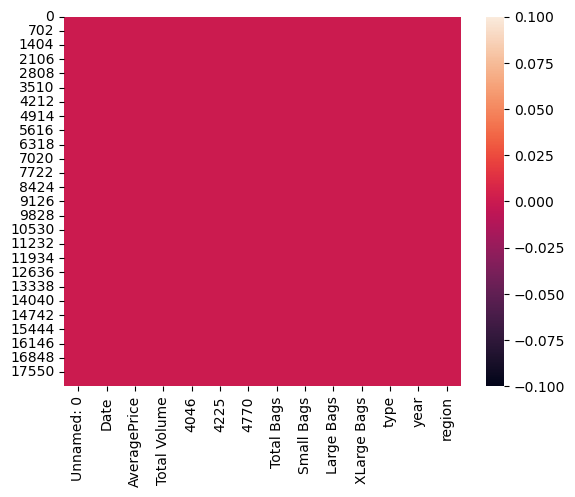

In [95]:
sns.heatmap(avo.isnull())

visualization of no null values through heatmap.
And we can see there are no null values as the colour is same.

<Axes: >

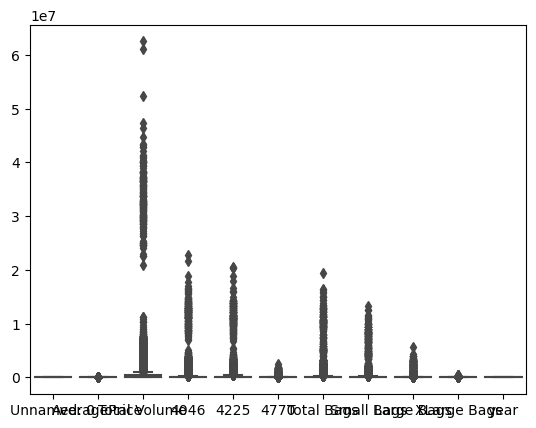

In [96]:
#dropping of duplicates values
avo.drop_duplicates(inplace=True)
sns.boxplot(avo)

In [97]:
avo

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


As we can see there are no duplicate values as after dropping duplicate values the count of rows and columns are same.
That means no value is dropped.

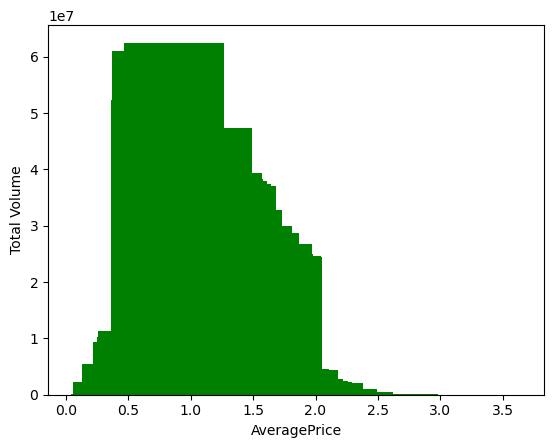

In [98]:
plt.bar(avo['AveragePrice'], avo['Total Volume'],color='green')
plt.xlabel('AveragePrice')
plt.ylabel('Total Volume')
plt.show()

visualization of averageprice in comparison to total volume through bargraph.

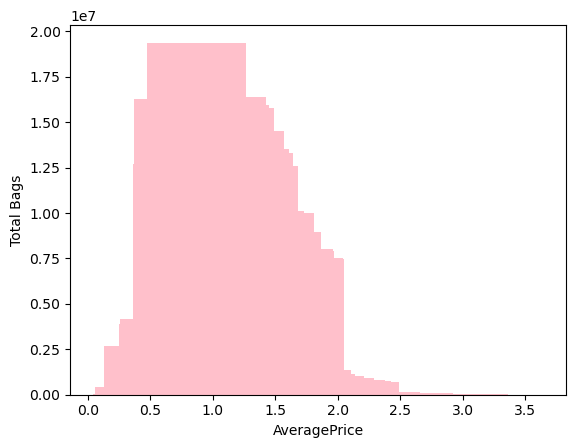

In [99]:
plt.bar(avo['AveragePrice'], avo['Total Bags'],color='pink')
plt.xlabel('AveragePrice')
plt.ylabel('Total Bags')
plt.show()

visualization of averageprice in comparison to total bags through bargraph.

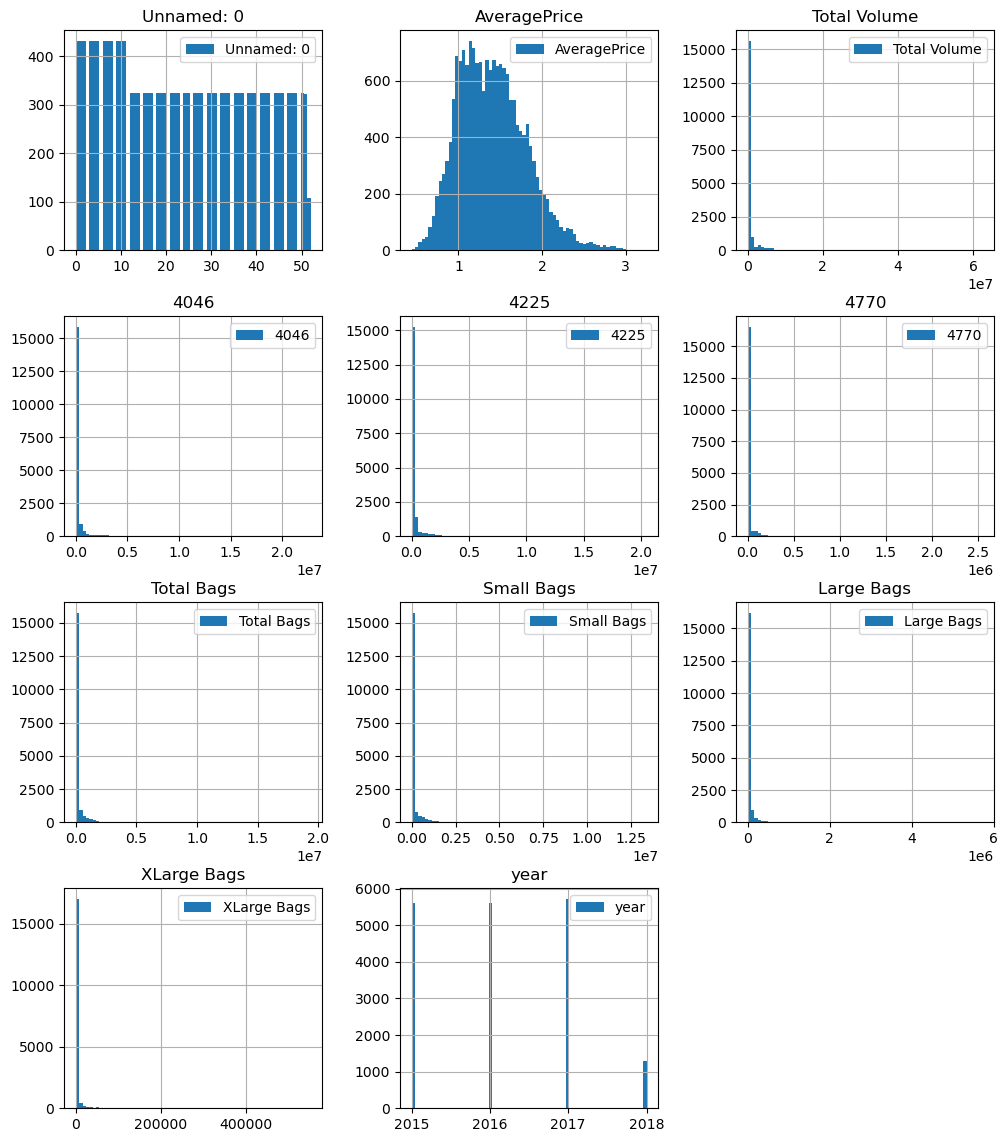

In [100]:
avo.hist(bins=70, figsize=(12,14),legend=True)
plt.show()

visualization of all the columns.

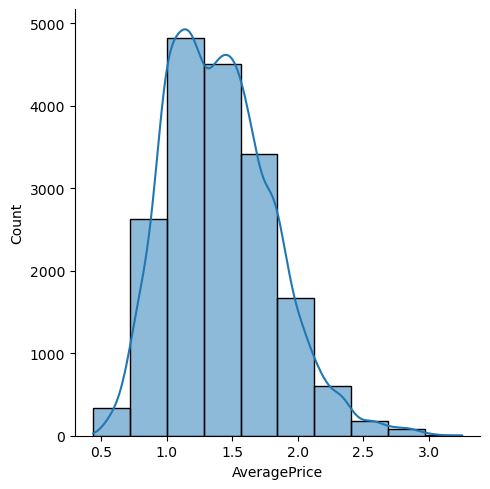

In [101]:
#type of avocado
sns.displot(avo['AveragePrice'],bins=10,kde=True)

We can see that as the count goes up the average price also rise.
It is skewed towards right.

In [102]:
#checking the correlation
avo.corr

<bound method DataFrame.corr of        Unnamed: 0        Date  AveragePrice  Total Volume     4046       4225  \
0               0  2015-12-27          1.33      64236.62  1036.74   54454.85   
1               1  2015-12-20          1.35      54876.98   674.28   44638.81   
2               2  2015-12-13          0.93     118220.22   794.70  109149.67   
3               3  2015-12-06          1.08      78992.15  1132.00   71976.41   
4               4  2015-11-29          1.28      51039.60   941.48   43838.39   
...           ...         ...           ...           ...      ...        ...   
18244           7  2018-02-04          1.63      17074.83  2046.96    1529.20   
18245           8  2018-01-28          1.71      13888.04  1191.70    3431.50   
18246           9  2018-01-21          1.87      13766.76  1191.92    2452.79   
18247          10  2018-01-14          1.93      16205.22  1527.63    2981.04   
18248          11  2018-01-07          1.62      17489.58  2894.77    2356.13

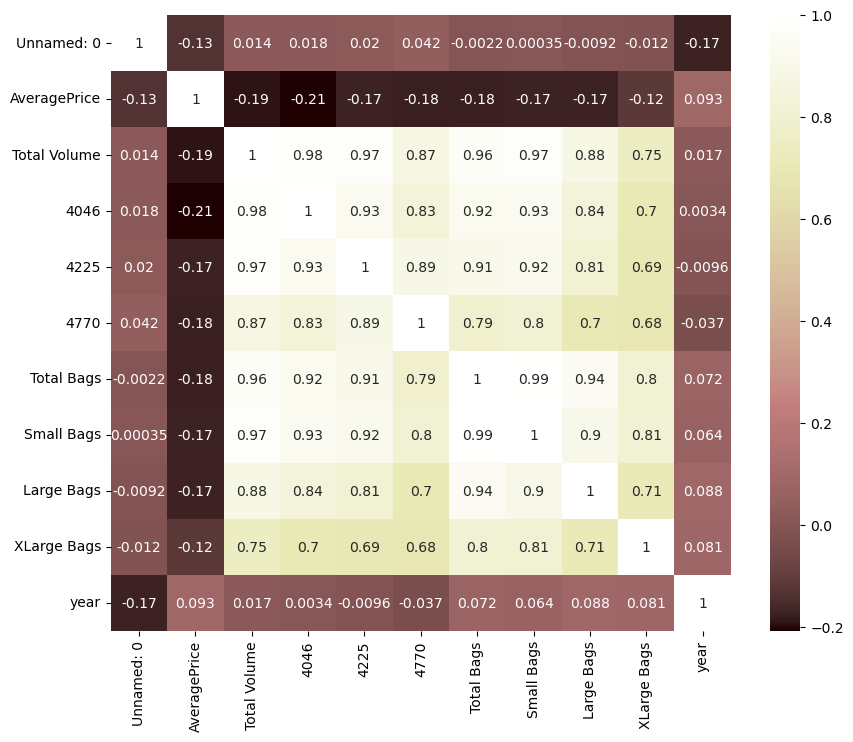

In [103]:
plt.figure(figsize=(10,8))
sns.heatmap(avo.corr(),cmap='pink',annot=True)
plt.show()

This heatmap contain both the positive and negative correlationship.
But there are no positive relationship between the target and feature.
4046,4770,total bag, small bag,large bag, xlargebags are negatively correlated with averageprice.
Rest are positively correlated with each other and negatively with averageprice.

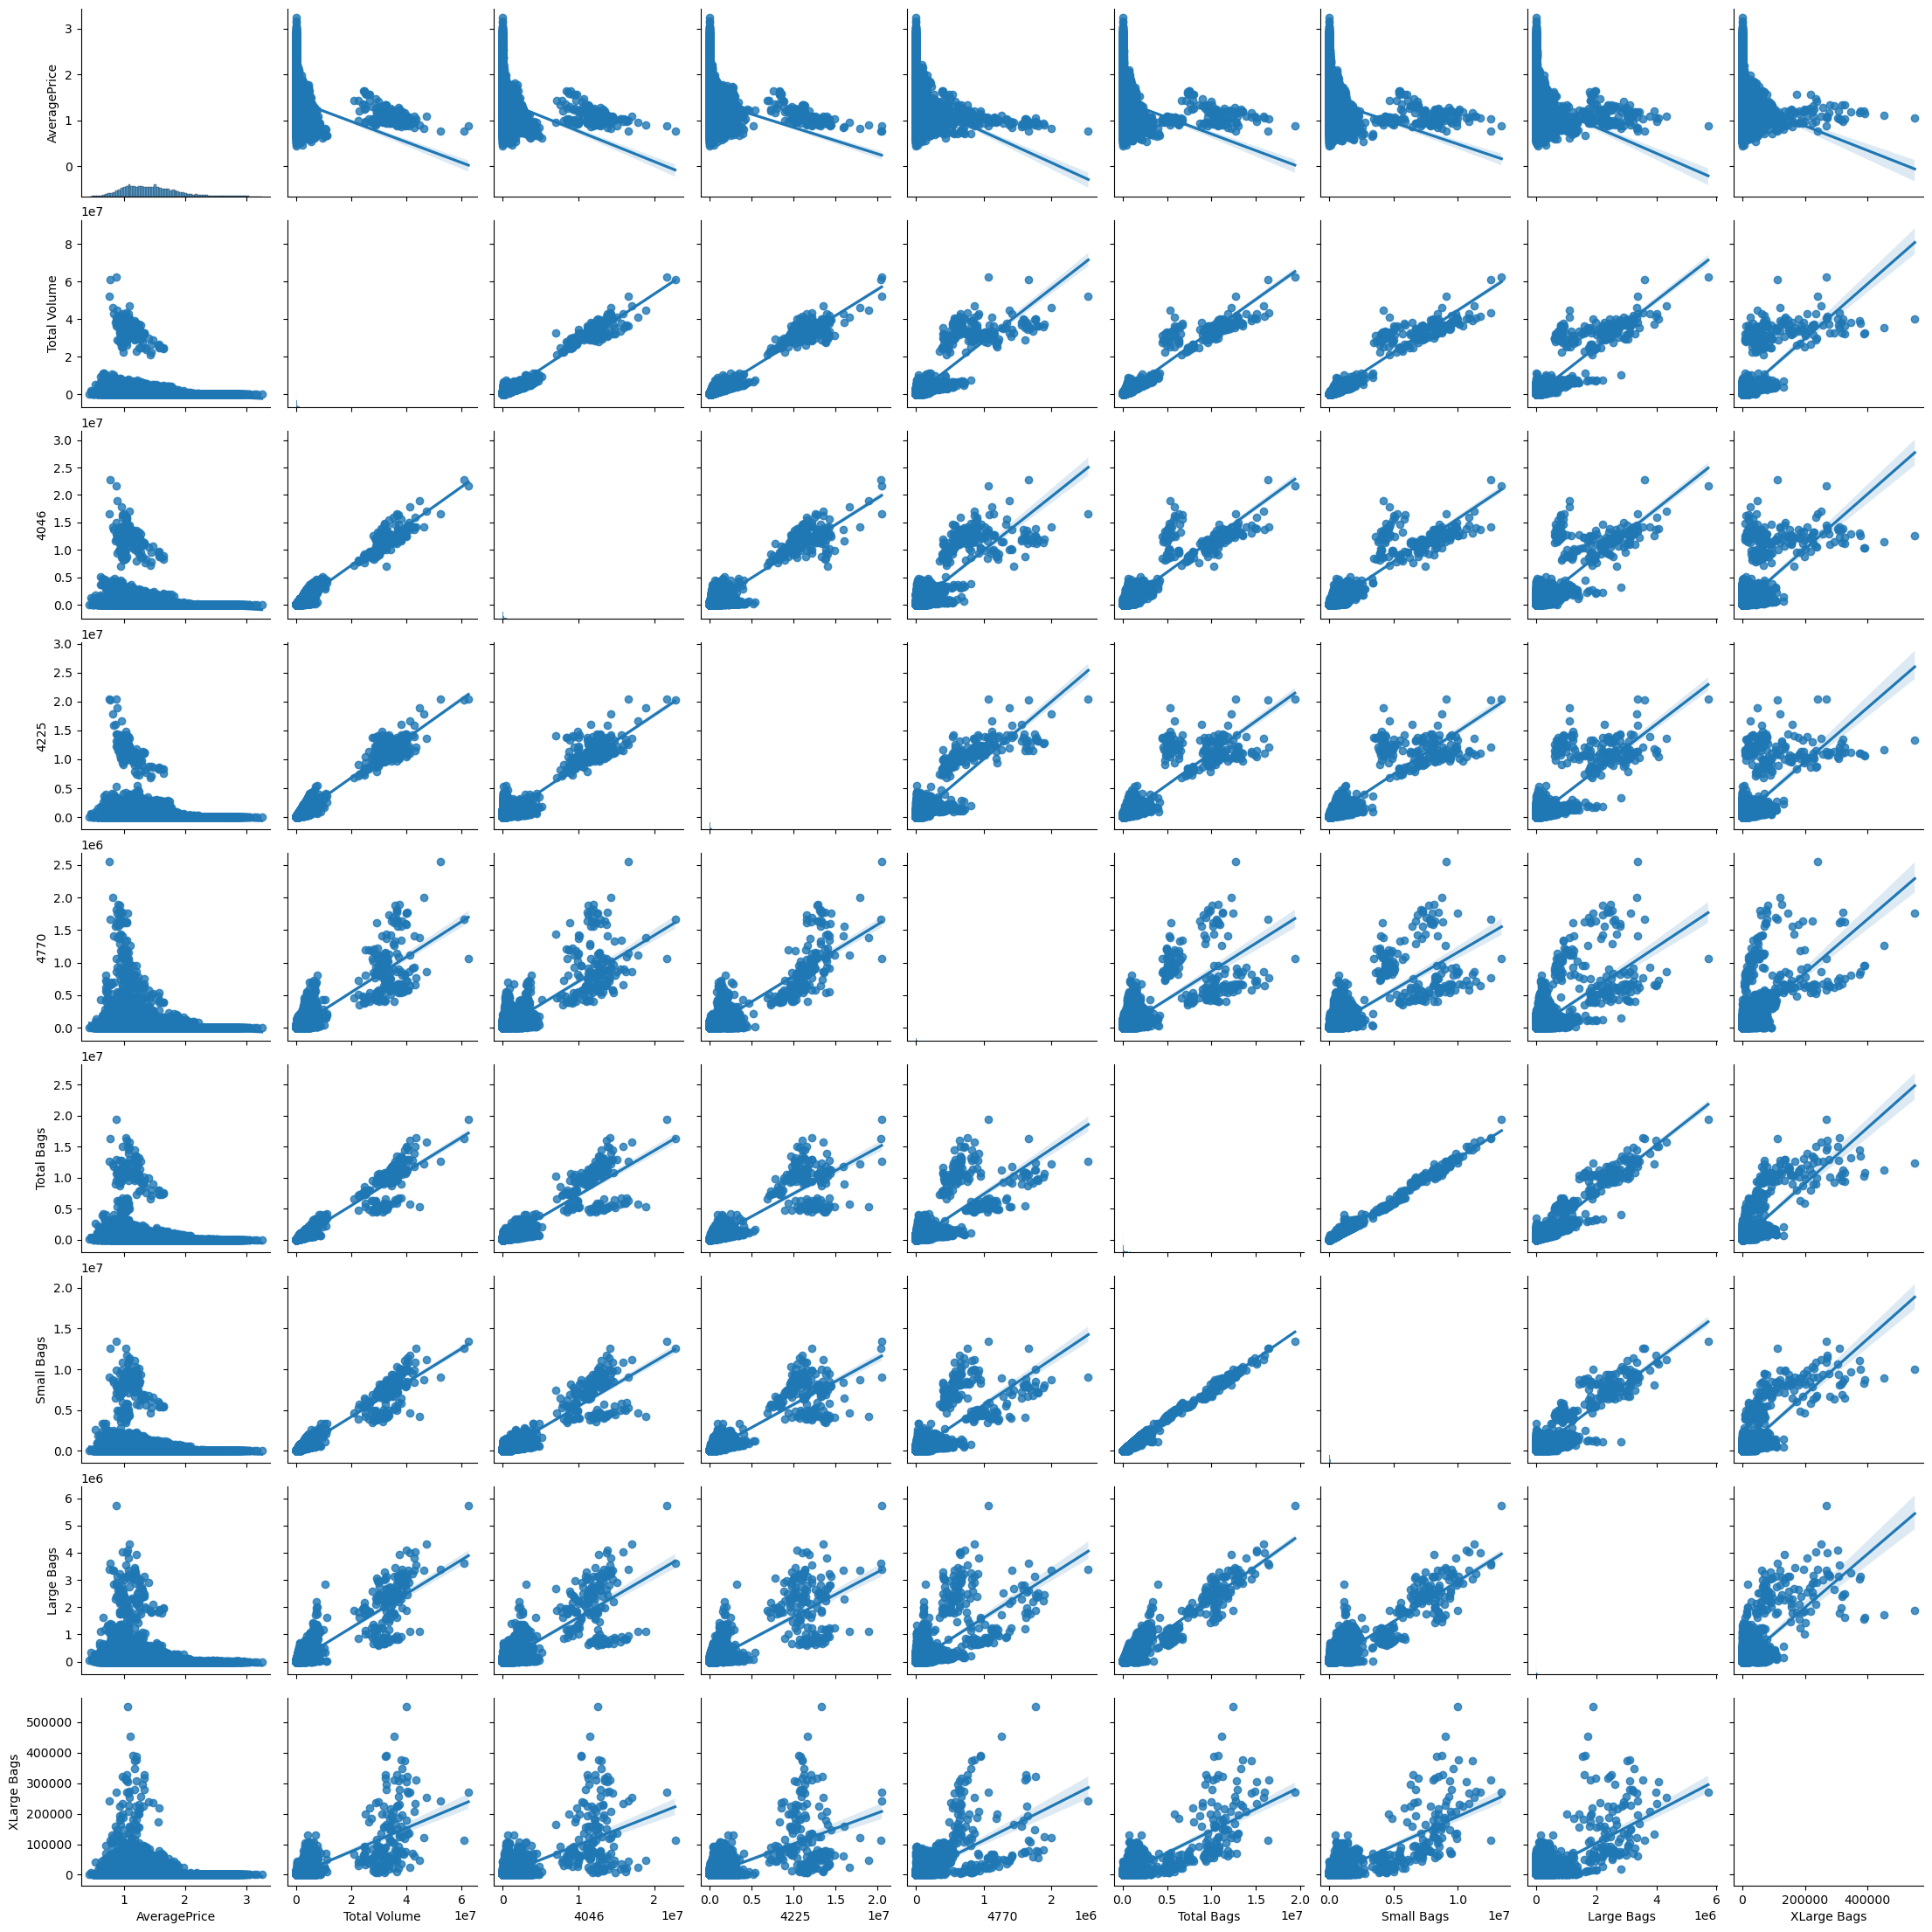

In [105]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
sns.pairplot(avo[['AveragePrice','Total Volume','4046','4225','4770','Total Bags','Small Bags','Large Bags','XLarge Bags']], kind='reg')

On most dimensions, the points are scattered.
But we can clearly see some strong relationship between average price and other columns in the index. 

In [116]:
#converting categorical data into numerical data
enc=OrdinalEncoder()
avo[['Date','year','type','region']]=enc.fit_transform(avo[['Date','year','type','region']])

In [117]:
avo['AveragePrice']=avo['AveragePrice'].astype(int)
avo['region']=avo['region'].astype(int)
avo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18249 entries, 0 to 18248
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  float64
 2   AveragePrice  18249 non-null  int32  
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  float64
 12  year          18249 non-null  float64
 13  region        18249 non-null  int32  
 14  typr          18249 non-null  float64
dtypes: float64(12), int32(2), int64(1)
memory usage: 2.1 MB


Unnamed: 0         Axes(0.125,0.786098;0.227941x0.0939024)
Date            Axes(0.398529,0.786098;0.227941x0.0939024)
AveragePrice    Axes(0.672059,0.786098;0.227941x0.0939024)
Total Volume       Axes(0.125,0.673415;0.227941x0.0939024)
4046            Axes(0.398529,0.673415;0.227941x0.0939024)
4225            Axes(0.672059,0.673415;0.227941x0.0939024)
4770               Axes(0.125,0.560732;0.227941x0.0939024)
Total Bags      Axes(0.398529,0.560732;0.227941x0.0939024)
Small Bags      Axes(0.672059,0.560732;0.227941x0.0939024)
Large Bags         Axes(0.125,0.448049;0.227941x0.0939024)
XLarge Bags     Axes(0.398529,0.448049;0.227941x0.0939024)
type            Axes(0.672059,0.448049;0.227941x0.0939024)
year               Axes(0.125,0.335366;0.227941x0.0939024)
region          Axes(0.398529,0.335366;0.227941x0.0939024)
typr            Axes(0.672059,0.335366;0.227941x0.0939024)
dtype: object

<Figure size 1500x2000 with 0 Axes>

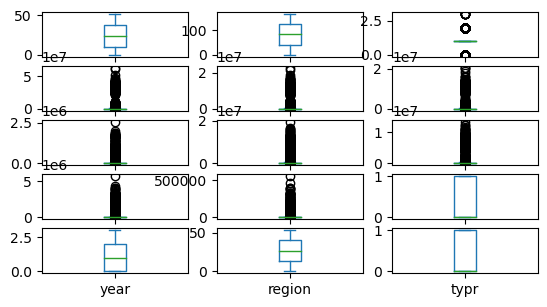

In [118]:
#checking for outliers
fig=plt.figure(figsize=(15,20))
avo.plot(kind='box',subplots=True,layout=(7,3))  

Here we can see the presence of outliers in almost all the columns.

In [119]:
#removing outliers
out=avo[['Total Volume','4046','4225','4770','Total Bags','Small Bags','Large Bags','XLarge Bags']]
z=np.abs(zscore(out))
z

,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags
0,0.227716,0.230816,0.199902,0.212091,0.234170,0.232647,0.222352,0.17558
1,0.230427,0.231103,0.208054,0.211997,0.233350,0.231568,0.222335,0.17558
2,0.212085,0.231007,0.154478,0.211325,0.234730,0.233399,0.222311,0.17558
3,0.223444,0.230741,0.185350,0.211864,0.237096,0.236568,0.222186,0.17558
4,0.231538,0.230891,0.208719,0.211834,0.236718,0.236154,0.221924,0.17558
...,...,...,...,...,...,...,...,...
18244,0.241373,0.230017,0.243857,0.212540,0.229301,0.226665,0.220964,0.17558
18245,0.242296,0.230693,0.242277,0.212540,0.233594,0.232196,0.221403,0.17558
18246,0.242331,0.230693,0.243090,0.205766,0.233463,0.231644,0.222561,0.17558
18247,0.241625,0.230428,0.242651,0.205774,0.231866,0.229543,0.222529,0.17558


In [120]:
np.where(z>3)

(array([ 346,  359,  780, ..., 9111, 9112, 9113], dtype=int64),
 array([1, 1, 7, ..., 6, 6, 6], dtype=int64))

In [121]:
avo1=avo[(z<3).all(axis=1)]
avo1.shape

(17782, 15)

In [122]:
#checking skewness
avo1.skew()

Unnamed: 0      0.112971
Date            0.004284
AveragePrice   -0.170008
Total Volume    3.782060
4046            4.928850
4225            4.472729
4770            5.137120
Total Bags      4.082103
Small Bags      4.238647
Large Bags      5.072468
XLarge Bags     6.159391
type           -0.052210
year            0.220792
region          0.005773
typr           -0.052210
dtype: float64

In [123]:
#distributing the data
x=avo.iloc[:,:-1]
y=avo.iloc[:,-1]

In [124]:
x=avo.drop('AveragePrice',axis=1)
y=avo['AveragePrice']
print('feature dimension',x.shape)
print('label dimension',y.shape)

feature dimension (18249, 14)
label dimension (18249,)


In [125]:
#scaling of data
st=StandardScaler()
x=st.fit_transform(x)
x

array([[-1.5653269 , -0.67635986, -0.22771641, ..., -1.22128204,
        -1.7002522 , -0.99983562],
       [-1.50073001, -0.69685742, -0.23042664, ..., -1.22128204,
        -1.7002522 , -0.99983562],
       [-1.43613312, -0.71735497, -0.21208462, ..., -1.22128204,
        -1.7002522 , -0.99983562],
       ...,
       [-0.98395486,  1.53737632, -0.24233073, ...,  1.97050371,
         1.70081131,  1.00016441],
       [-0.91935797,  1.51687877, -0.24162464, ...,  1.97050371,
         1.70081131,  1.00016441],
       [-0.85476108,  1.49638121, -0.24125273, ...,  1.97050371,
         1.70081131,  1.00016441]])

here we hace scaled the data using the standard scalarization method to overcome the issue of biasness.

# model buliding with regression

In [126]:
from sklearn.metrics import r2_score
from sklearn import datasets
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn import metrics
from sklearn.linear_model import Ridge, Lasso

In [127]:
maxAccu=0
maxRs=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=i)
    knn=KNN()
    knn.fit(x_train,y_train)
    pre=knn.predict(x_test)
    acc=r2_score(y_test,pre)
    if acc>maxAccu:
        maxAccu=acc
        maxRs=i
print('Best accuracy',maxAccu,'at random state',maxRs)        

Best accuracy 0.530212000696035 at random state 116


In [128]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=maxRs)

In [129]:
#Ridge
rd=Ridge()
rd.fit(x_train,y_train)
pre=rd.predict(x_test)
pred=rd.predict(x_train)
print("R2 score:",r2_score(y_train,pred))
print("R2 score training data:",r2_score(y_test,pre)*100)
print('Mean absolute error:',mean_absolute_error(y_test,pre))
print('Mean square error:',mean_squared_error(y_test,pre))
print('Root mean square error:',np.sqrt(mean_squared_error(y_test,pre)))

R2 score: 0.2311415318967044
R2 score training data: 26.143411606197418
Mean absolute error: 0.32035129091875264
Mean square error: 0.18010963527885587
Root mean square error: 0.42439325545872647


In [130]:
#support vector regression
svr=SVR()
svr.fit(x_train,y_train)
pre=svr.predict(x_test)
pred=svr.predict(x_train)
print(r2_score(y_train,pred))
print(r2_score(y_test,pre)*100)
print('Mean absolute error:',mean_absolute_error(y_test,pre))
print('Mean square error:',mean_squared_error(y_test,pre))
print('Root mean square error:',np.sqrt(mean_squared_error(y_test,pre)))

0.3458496646539898
35.925126609056456
Mean absolute error: 0.24817565099044644
Mean square error: 0.15625555320058743
Root mean square error: 0.39529173176350074


In [131]:
#Randomforest
ra=RandomForestRegressor()
ra.fit(x_train,y_train)
pre=ra.predict(x_test)
pred=ra.predict(x_train)
print(r2_score(y_train,pred))
print(r2_score(y_test,pre)*100)
print('Mean absolute error:',mean_absolute_error(y_test,pre))
print('Mean square error:',mean_squared_error(y_test,pre))
print('Root mean square error:',np.sqrt(mean_squared_error(y_test,pre)))

0.9555989163161023
72.15101773247956
Mean absolute error: 0.14890958904109589
Mean square error: 0.06791364383561643
Root mean square error: 0.2606024632186281


In [132]:
#KNN
knn=KNN()
knn.fit(x_train,y_train)
pre=knn.predict(x_test)
pred=knn.predict(x_train)
print(r2_score(y_train,pred))
print(r2_score(y_test,pre)*100)
print('Mean absolute error:',mean_absolute_error(y_test,pre))
print('Mean square error:',mean_squared_error(y_test,pre))
print('Root mean square error:',np.sqrt(mean_squared_error(y_test,pre)))

0.6777888510208827
53.0212000696035
Mean absolute error: 0.19642009132420093
Mean square error: 0.11456438356164386
Root mean square error: 0.3384736083679847


In [133]:
#Lasso
las=Lasso()
las.fit(x_train,y_train)
pre=las.predict(x_test)
pred=las.predict(x_train)
print(r2_score(y_train,pred))
print(r2_score(y_test,pre)*100)
print('Mean absolute error:',mean_absolute_error(y_test,pre))
print('Mean square error:',mean_squared_error(y_test,pre))
print('Root mean square error:',np.sqrt(mean_squared_error(y_test,pre)))

0.0
-0.04417659045368172
Mean absolute error: 0.2965566758391225
Mean square error: 0.24397173697495153
Root mean square error: 0.4939349521697685


In [134]:
#Extratrees regressor
ex=ExtraTreesRegressor()
ex.fit(x_train,y_train)
pre=ex.predict(x_test)
pred=ex.predict(x_train)
print(r2_score(y_train,pred))
print(r2_score(y_test,pre)*100)
print('Mean absolute error:',mean_absolute_error(y_test,pre))
print('Mean square error:',mean_squared_error(y_test,pre))
print('Root mean square error:',np.sqrt(mean_squared_error(y_test,pre)))

1.0
75.95535382058709
Mean absolute error: 0.13456803652968036
Mean square error: 0.05863623744292238
Root mean square error: 0.24214920491903824


In [135]:
#Linear regression
lr=LinearRegression()
lr.fit(x_train,y_train)
pre=lr.predict(x_test)
pred=lr.predict(x_train)
print(r2_score(y_train,pred))
print(r2_score(y_test,pre)*100)
print('Mean absolute error:',mean_absolute_error(y_test,pre))
print('Mean square error:',mean_squared_error(y_test,pre))
print('Root mean square error:',np.sqrt(mean_squared_error(y_test,pre)))

0.23148036767645153
26.15705870932229
Mean absolute error: 0.320359803383928
Mean square error: 0.18007635490644916
Root mean square error: 0.4243540442913784


# Cross Validation

In [136]:
# Cv score for Ridge
score= cross_val_score(rd,x,y,cv=5,scoring='r2')
print(score)
print(score.mean())
print('difference between R2score and cross validation',(r2_score(y_test,pre)-score.mean())*10)

[-0.0152164   0.10900245  0.01344558  0.01204115  0.02766562]
0.02938768125596931
difference between R2score and cross validation 2.321829058372536


In [137]:
# Cv score for support vector
score= cross_val_score(svr,x,y,cv=5,scoring='r2')
print(score)
print(score.mean())
print('difference between R2score and cross validation',(r2_score(y_test,pre)-score.mean())*10)

[-0.22122952  0.09944776  0.22951047  0.03817433 -0.16487468]
-0.003794326230837264
difference between R2score and cross validation 2.6536491332406014


In [138]:
# Cv score for Random forest
score= cross_val_score(ra,x,y,cv=5,scoring='r2')
print(score)
print(score.mean())
print('difference between R2score and cross validation',(r2_score(y_test,pre)-score.mean())*10)

[0.0687068  0.42094187 0.33332551 0.2112871  0.12130578]
0.23111341115412518
difference between R2score and cross validation 0.3045717593909772


In [139]:
# Cv score for KNN
score= cross_val_score(knn,x,y,cv=5,scoring='r2')
print(score)
print(score.mean())
print('difference between R2score and cross validation',(r2_score(y_test,pre)-score.mean())*10)

[-0.20772606  0.0415722   0.13452057 -0.0283779   0.03423858]
-0.005154524262536264
difference between R2score and cross validation 2.6672511135575916


In [140]:
# Cv score for lasso
score= cross_val_score(las,x,y,cv=5,scoring='r2')
print(score)
print(score.mean())
print('difference between R2score and cross validation',(r2_score(y_test,pre)-score.mean())*10)

[-0.38213606 -0.32024237 -0.00470203 -0.26895808 -0.45959054]
-0.287125817623225
difference between R2score and cross validation 5.486964047164479


In [141]:
# Cv score for Extatrees regressor
score= cross_val_score(ex,x,y,cv=5,scoring='r2')
print(score)
print(score.mean())
print('difference between R2score and cross validation',(r2_score(y_test,pre)-score.mean())*10)

[0.19844086 0.4259723  0.36564939 0.19295589 0.09396795]
0.25539727934596373
difference between R2score and cross validation 0.0617330774725916


In [142]:
# Cv score for Linear regression
score= cross_val_score(lr,x,y,cv=5,scoring='r2')
print(score)
print(score.mean())
print('difference between R2score and cross validation',(r2_score(y_test,pre)-score.mean())*10)

[-0.01669015  0.10856306  0.01385744  0.01142188 -0.40795073]
-0.05815969942854924
difference between R2score and cross validation 3.1973028652177216


ExtraTrees regressor is our best model as the difference between R2 score and cross validation score is least

# Setting Paramaters

In [143]:
from sklearn import datasets
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

In [144]:
para={'n_estimators':[80,100],
      'criterion':['squared_error','poisson'],
     'n_jobs':['int',None],
     'ccp_alpha':[0.0]}
ex_cv=GridSearchCV(ex,para,cv=5)
ex_cv.fit(x_train,y_train)
print(ex_cv.best_params_)

{'ccp_alpha': 0.0, 'criterion': 'squared_error', 'n_estimators': 100, 'n_jobs': None}


In [145]:
ex_new=ExtraTreesRegressor(criterion='squared_error',ccp_alpha=0.0,n_jobs=None,n_estimators=100)
ex_new.fit(x_train,y_train)
y_pred_new=ex_new.predict(x_test)
print(metrics.r2_score(y_test,y_pred_new))

0.760500244460447


In [146]:
ex_new.fit(x_train,y_train)
pre=ex_new.predict(x_test)
print('R2 score:',r2_score(y_test,pre))
print('mean absolute error:',mean_absolute_error(y_test,pre))
print('mean square error;',mean_squared_error(y_test,pre))
print('root mean squre error:',np.sqrt(mean_squared_error(y_test,pre)))

R2 score: 0.7602244713252136
mean absolute error: 0.13554703196347034
mean square error; 0.05847262100456621
root mean squre error: 0.2418111267178709


In [147]:
#importing pickle and saving file
import joblib
import pickle
filename="Avocado.pkl"
pickle.dump(ex_new,open(filename,'wb'))

In [148]:
#predicting the save model
load_m=pickle.load(open('Avocado.pkl','rb'))

In [149]:
result=load_m.score(x_test,y_test)
print(result*100)

76.02244713252136


In [150]:
con=pd.DataFrame([load_m.predict(x_test)[:],y_test[:]],index=['predicted','orginal'])
con

,0,1,2,3,4,5,6,7,8,9,...,5465,5466,5467,5468,5469,5470,5471,5472,5473,5474
predicted,0.0,0.28,1.1,1.04,0.03,1.0,0.06,0.95,1.07,0.98,...,0.31,0.92,0.9,1.59,0.69,1.0,0.6,0.99,1.99,2.0
orginal,0.0,0.00,1.0,1.00,0.00,1.0,0.00,1.00,1.00,1.00,...,1.00,1.00,1.0,1.00,1.00,1.0,0.0,1.00,2.00,2.0


# Building model using classification

In [151]:
maxAccu=0
maxRs=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=i)
    dtc=DecisionTreeClassifier()
    dtc.fit(x_train,y_train)
    pre=dtc.predict(x_test)
    acc=accuracy_score(y_test,pre)
    if acc>maxAccu:
        maxAccu=acc
        maxRs=i
print('Best accuracy',maxAccu,'at random state',maxRs)        
    

Best accuracy 0.8801826484018265 at random state 196


In [152]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=maxRs)

In [153]:
#DecisionTreeClassifier
dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)
preddtc=dtc.predict(x_test)
print(accuracy_score(y_test,preddtc))
print(confusion_matrix(y_test,preddtc))
print(classification_report(y_test,preddtc))


0.8774429223744292
[[ 612  224    0    0]
 [ 208 3893  128    0]
 [   0  107  299    0]
 [   0    0    4    0]]
              precision    recall  f1-score   support

           0       0.75      0.73      0.74       836
           1       0.92      0.92      0.92      4229
           2       0.69      0.74      0.71       406
           3       0.00      0.00      0.00         4

    accuracy                           0.88      5475
   macro avg       0.59      0.60      0.59      5475
weighted avg       0.88      0.88      0.88      5475



The accuracy score of Decision tree is 87.74%

In [154]:
# Random forest classifier
Rc=RandomForestClassifier()
Rc.fit(x_train,y_train)
preRc=Rc.predict(x_test)
print(accuracy_score(y_test,preRc))
print(confusion_matrix(y_test,preRc))
print(classification_report(y_test,preRc))

0.9176255707762557
[[ 630  206    0    0]
 [  76 4118   35    0]
 [   0  130  276    0]
 [   0    1    3    0]]
              precision    recall  f1-score   support

           0       0.89      0.75      0.82       836
           1       0.92      0.97      0.95      4229
           2       0.88      0.68      0.77       406
           3       0.00      0.00      0.00         4

    accuracy                           0.92      5475
   macro avg       0.67      0.60      0.63      5475
weighted avg       0.92      0.92      0.91      5475



The accuracy score of Random forest is 91.76%

In [155]:
# Logistic regression
lg=LogisticRegression()
lg.fit(x_train,y_train)
prelg=lg.predict(x_test)
print(accuracy_score(y_test,prelg))
print(confusion_matrix(y_test,prelg))
print(classification_report(y_test,prelg))

0.782283105022831
[[ 119  717    0    0]
 [  65 4164    0    0]
 [   0  406    0    0]
 [   0    4    0    0]]
              precision    recall  f1-score   support

           0       0.65      0.14      0.23       836
           1       0.79      0.98      0.87      4229
           2       0.00      0.00      0.00       406
           3       0.00      0.00      0.00         4

    accuracy                           0.78      5475
   macro avg       0.36      0.28      0.28      5475
weighted avg       0.71      0.78      0.71      5475



The accuracy score of Logistic regression is 78.22%

In [156]:
#Support vector machine
svc=SVC()
svc.fit(x_train,y_train)
presvc=svc.predict(x_test)
print(accuracy_score(y_test,presvc))
print(confusion_matrix(y_test,presvc))
print(classification_report(y_test,presvc))

0.8151598173515981
[[ 332  504    0    0]
 [  98 4131    0    0]
 [   0  406    0    0]
 [   0    4    0    0]]
              precision    recall  f1-score   support

           0       0.77      0.40      0.52       836
           1       0.82      0.98      0.89      4229
           2       0.00      0.00      0.00       406
           3       0.00      0.00      0.00         4

    accuracy                           0.82      5475
   macro avg       0.40      0.34      0.35      5475
weighted avg       0.75      0.82      0.77      5475



The accuracy score of support vector is 81.51%

In [157]:
# Ada boost classifier
ada=AdaBoostClassifier()
ada.fit(x_train,y_train)
preada=ada.predict(x_test)
print(accuracy_score(y_test,preada))
print(confusion_matrix(y_test,preada))
print(classification_report(y_test,preada))

0.4958904109589041
[[ 786   50    0    0]
 [2300 1929    0    0]
 [  49  357    0    0]
 [   0    4    0    0]]
              precision    recall  f1-score   support

           0       0.25      0.94      0.40       836
           1       0.82      0.46      0.59      4229
           2       0.00      0.00      0.00       406
           3       0.00      0.00      0.00         4

    accuracy                           0.50      5475
   macro avg       0.27      0.35      0.25      5475
weighted avg       0.68      0.50      0.51      5475



The accuracy score of Adaboost is 49.58%

In [158]:
# Extra tree classifier
ex=ExtraTreesClassifier()
ex.fit(x_train,y_train)
preada=ex.predict(x_test)
print(accuracy_score(y_test,preada))
print(confusion_matrix(y_test,preada))
print(classification_report(y_test,preada))

0.9227397260273973
[[ 651  185    0    0]
 [  83 4111   35    0]
 [   1  115  290    0]
 [   0    0    4    0]]
              precision    recall  f1-score   support

           0       0.89      0.78      0.83       836
           1       0.93      0.97      0.95      4229
           2       0.88      0.71      0.79       406
           3       0.00      0.00      0.00         4

    accuracy                           0.92      5475
   macro avg       0.67      0.62      0.64      5475
weighted avg       0.92      0.92      0.92      5475



The accuracy score of Extratree is 92.27%

# checking the cross validation

In [159]:
# Cv score for decisiontree
score= cross_val_score(dtc,x,y,cv=5)
print(score)
print(score.mean())
print(score.std())
print('difference between accuracu score and cross validation',accuracy_score(y_test,preddtc)-score.mean())

[0.34136986 0.40438356 0.28465753 0.24246575 0.07837764]
0.2702508700075457
0.1103126394231709
difference between accuracu score and cross validation 0.6071920523668835


cross validation score of decisiontree is 0.2702508700075457

In [160]:
# Cv score for randomforest
score= cross_val_score(Rc,x,y,cv=5)
print(score)
print(score.mean())
print(score.std())
print('difference between accuracy score and corss validation',accuracy_score(y_test,preRc)-score.mean())

[0.24246575 0.46109589 0.35589041 0.21232877 0.14524527]
0.2834052189190508
0.11193225663822277
difference between accuracy score and corss validation 0.6342203518572049


cross validation score of randomforest is 0.2834052189190508

In [161]:
# Cv score for logistic regression
score= cross_val_score(lg,x,y,cv=5)
print(score)
print(score.mean())
print(score.std())
print('difference between accuracy score and corss validation',accuracy_score(y_test,prelg)-score.mean())

[0.38191781 0.5369863  0.72547945 0.77917808 0.37352699]
0.559417727506504
0.16878143558647296
difference between accuracy score and corss validation 0.22286537751632707


cross validation score of logistic regression is 0.559417727506504

In [162]:
# Cv score for support vector machine
score= cross_val_score(svc,x,y,cv=5)
print(score)
print(score.mean())
print(score.std())
print('difference between accuracy score and cross validation',accuracy_score(y_test,presvc)-score.mean())

[0.2        0.42876712 0.21369863 0.21479452 0.13126884]
0.2377058229501796
0.10035562149615529
difference between accuracy score and cross validation 0.5774539944014185


cross validation score of supportvector is 0.2377058229501796

In [163]:
# Cv score for ada boost classifier
score= cross_val_score(ada,x,y,cv=5)
print(score)
print(score.mean())
print(score.std())
print('difference between accuracy score and cross validation',accuracy_score(y_test,preada)-score.mean())

[0.25863014 0.28986301 0.59890411 0.71123288 0.19786243]
0.41129851300975684
0.20433583057591131
difference between accuracy score and cross validation 0.5114412130176405


cross validation score of adaboost is 0.41129851300975684

In [164]:
# Cv score for Extatrees classifier
score= cross_val_score(ex,x,y,cv=5)
print(score)
print(score.mean())
print(score.std())
print('difference between accuracy score and cross validation',accuracy_score(y_test,preada)-score.mean())

[0.16794521 0.12547945 0.18876712 0.15506849 0.13647575]
0.1547472041505085
0.022459264596064597
difference between accuracy score and cross validation 0.7679925218768888


cross validation score of Extra trees classifier is 0.1547472041505085

Logistic regression is our best model as the difference between accuracy score and cross validation score is least

# Setting paramaters

In [165]:
from sklearn import datasets
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

In [166]:
#checking the new set parameters
para={'max_iter':[100],
      'random_state':[None],
     'tol':[0.0001],
     'C':[1.0]}
lg_cv=GridSearchCV(svc,para,cv=10)
lg_cv.fit(x_train,y_train)
print(lg_cv.best_params_)

{'C': 1.0, 'max_iter': 100, 'random_state': None, 'tol': 0.0001}


In [167]:
lg_new=LogisticRegression(C=1.0,max_iter=100,random_state=None,tol=0.0001)
lg_new.fit(x_train,y_train)
y_pred_new=lg_new.predict(x_test)
print(metrics.accuracy_score(y_test,y_pred_new))
print(acc*100)

0.782283105022831
87.41552511415524


In [168]:
#Saving the model
import joblib
import pickle
filename="Avocado.pkl"
pickle.dump(lg_new,open(filename,'wb'))

In [169]:
#predicting the save model
model=pickle.load(open('Avocado.pkl','rb'))

In [170]:
result=model.score(x_test,y_test)
print(result*100)

78.22831050228311


In [171]:
con=pd.DataFrame([model.predict(x_test)[:],y_test[:]],index=['predicted','orginal'])
con

,0,1,2,3,4,5,6,7,8,9,...,5465,5466,5467,5468,5469,5470,5471,5472,5473,5474
predicted,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
orginal,1,2,2,1,1,1,1,1,1,1,...,1,1,2,1,1,1,1,1,1,1


this is the predicted average value of avocado